## 1. Import Libraries

In [13]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [14]:
file_path = r"/Users/suvankarmaity/Documents/CampusX Projects/Flight Price Prediction- Using AWS Sagemaker/Data/train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Delhi,Cochin,05:30:00,18:50:00,2240,2.0,No Info,12341
1,Indigo,2019-05-12,Kolkata,Banglore,19:35:00,23:15:00,220,1.0,No Info,5276
2,Jet Airways,2019-03-06,Delhi,Cochin,13:00:00,18:50:00,350,1.0,In-flight meal not included,15103
3,Indigo,2019-03-09,Delhi,Cochin,04:55:00,12:00:00,425,1.0,No Info,6171
4,Spicejet,2019-04-15,Banglore,Delhi,09:30:00,12:20:00,170,0.0,No check-in baggage included,4319
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-06-03,Delhi,Cochin,05:05:00,16:10:00,665,1.0,No Info,6818
636,Multiple Carriers,2019-05-27,Delhi,Cochin,06:00:00,19:15:00,795,1.0,No Info,10786
637,Jet Airways,2019-04-09,Banglore,Delhi,19:50:00,22:50:00,180,0.0,In-flight meal not included,4544
638,Jet Airways,2019-03-12,Banglore,New Delhi,07:00:00,21:20:00,860,1.0,No Info,13817


### 2.1 Fixing Data Types

In [15]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [16]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [17]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-29 05:30:00,2024-05-29 18:50:00,2240,2.0,No Info,12341
1,Indigo,2019-05-12,Kolkata,Banglore,2024-05-29 19:35:00,2024-05-29 23:15:00,220,1.0,No Info,5276
2,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-29 13:00:00,2024-05-29 18:50:00,350,1.0,In-flight meal not included,15103
3,Indigo,2019-03-09,Delhi,Cochin,2024-05-29 04:55:00,2024-05-29 12:00:00,425,1.0,No Info,6171
4,Spicejet,2019-04-15,Banglore,Delhi,2024-05-29 09:30:00,2024-05-29 12:20:00,170,0.0,No check-in baggage included,4319
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-06-03,Delhi,Cochin,2024-05-29 05:05:00,2024-05-29 16:10:00,665,1.0,No Info,6818
636,Multiple Carriers,2019-05-27,Delhi,Cochin,2024-05-29 06:00:00,2024-05-29 19:15:00,795,1.0,No Info,10786
637,Jet Airways,2019-04-09,Banglore,Delhi,2024-05-29 19:50:00,2024-05-29 22:50:00,180,0.0,In-flight meal not included,4544
638,Jet Airways,2019-03-12,Banglore,New Delhi,2024-05-29 07:00:00,2024-05-29 21:20:00,860,1.0,No Info,13817


## 3. High-level Summary of Data

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [19]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,610.406250,0.779687,8858.645313
std,493.657257,0.664240,4334.581715
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5174.500000
50%,480.000000,1.000000,8016.000000
75%,900.000000,1.000000,12284.000000
max,2315.000000,3.000000,36235.000000


In [20]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,227,277,277,339.0,500


## 4. High-level analysis of Missing Values

In [21]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## 5. High-level analysis of Outliers

In [22]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [23]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-29 05:30:00,2024-05-29 18:50:00,2240,2.0,No Info,12341,-1
1,Indigo,2019-05-12,Kolkata,Banglore,2024-05-29 19:35:00,2024-05-29 23:15:00,220,1.0,No Info,5276,-1
2,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-29 13:00:00,2024-05-29 18:50:00,350,1.0,In-flight meal not included,15103,-1
5,Jet Airways,2019-03-12,Banglore,New Delhi,2024-05-29 16:55:00,2024-05-29 10:45:00,1070,1.0,No Info,13817,-1
8,Vistara,2019-05-12,Kolkata,Banglore,2024-05-29 07:10:00,2024-05-29 09:05:00,1555,1.0,No Info,9397,-1
...,...,...,...,...,...,...,...,...,...,...,...
629,Air India,2019-05-15,Delhi,Cochin,2024-05-29 20:30:00,2024-05-29 23:00:00,1590,1.0,No Info,8907,-1
630,Air India,2019-05-24,Kolkata,Banglore,2024-05-29 09:10:00,2024-05-29 04:40:00,1170,2.0,No Info,6117,-1
631,Indigo,2019-06-24,Mumbai,Hyderabad,2024-05-29 20:05:00,2024-05-29 21:40:00,95,0.0,No Info,2227,-1
633,Air India,2019-06-06,Kolkata,Banglore,2024-05-29 14:35:00,2024-05-29 14:35:00,1440,1.0,No Info,6528,-1


## 6. Pair Plots

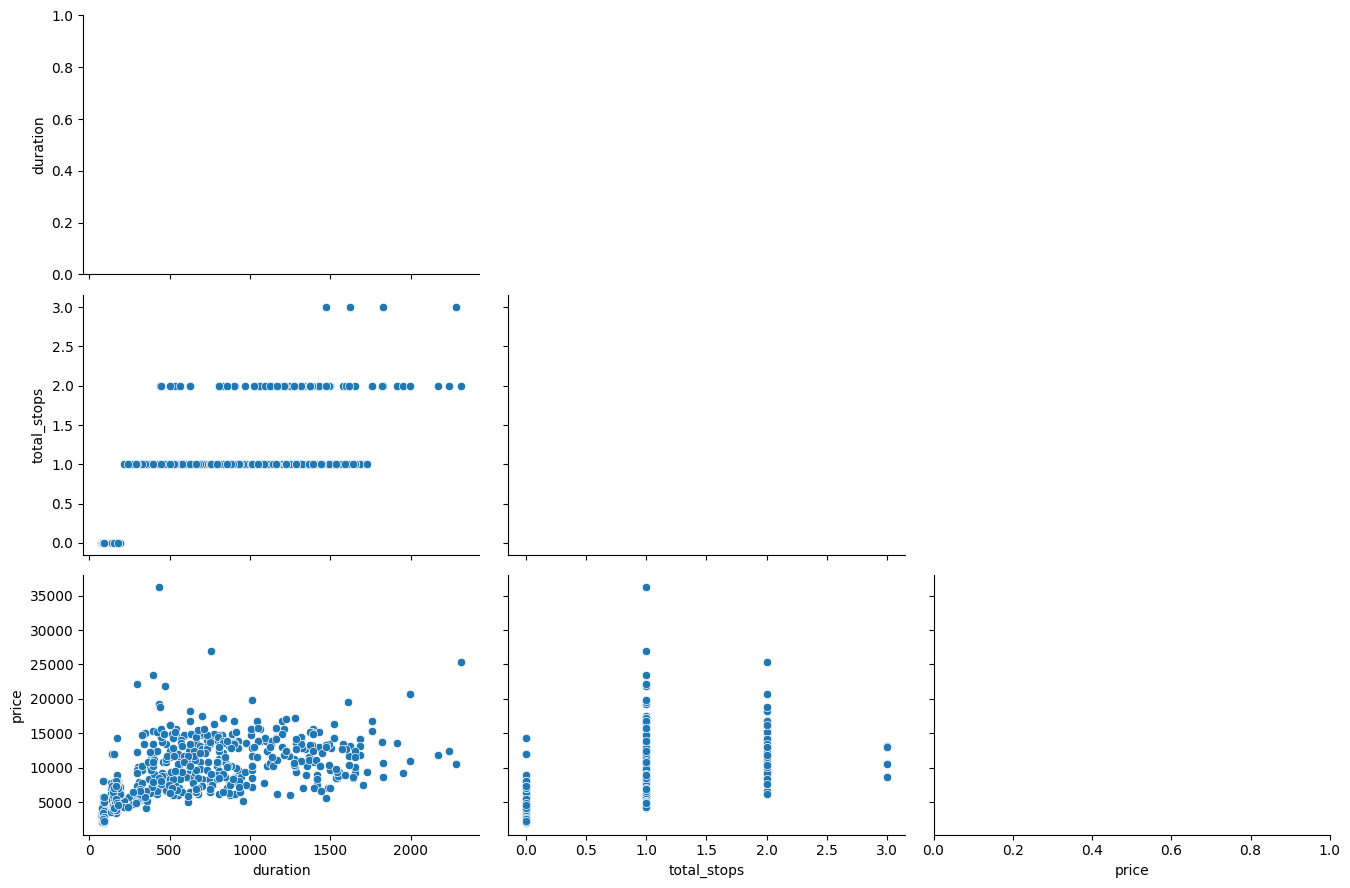

In [24]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

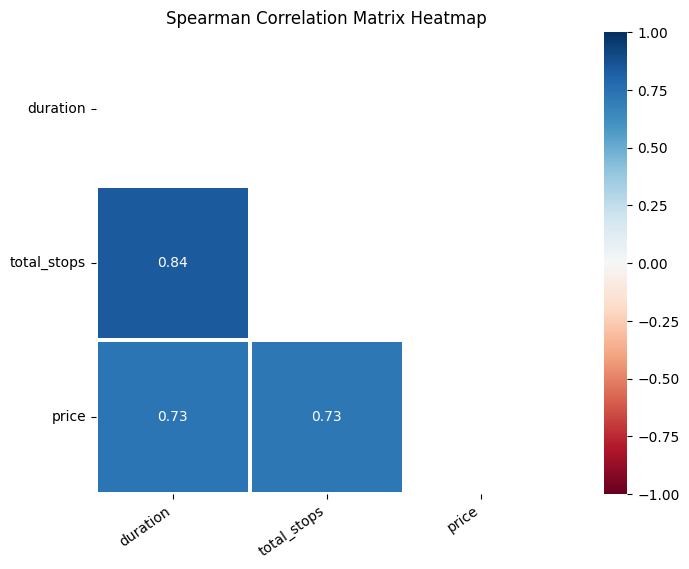

In [25]:
eda_helper_functions.correlation_heatmap(train)

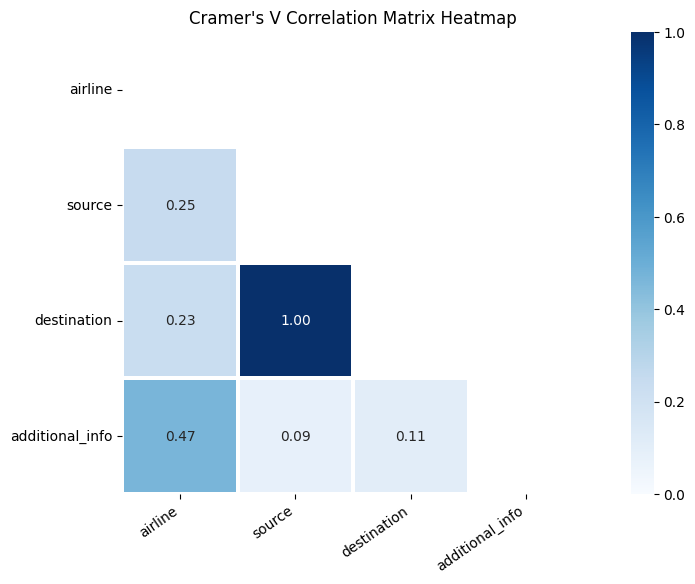

In [26]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [27]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [28]:
train.airline

0            Jet Airways
1                 Indigo
2            Jet Airways
3                 Indigo
4               Spicejet
             ...        
635               Indigo
636    Multiple Carriers
637          Jet Airways
638          Jet Airways
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [29]:
eda_helper_functions.cat_summary(train, "airline")

0            Jet Airways
1                 Indigo
2            Jet Airways
3                 Indigo
4               Spicejet
             ...        
635               Indigo
636    Multiple Carriers
637          Jet Airways
638          Jet Airways
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,227


,count,percentage
category,,
Jet Airways,227,0.354687
Indigo,140,0.218750
Air India,90,0.140625
Multiple Carriers,69,0.107813
Spicejet,51,0.079687
Vistara,29,0.045312
Air Asia,22,0.034375
Goair,12,0.018750


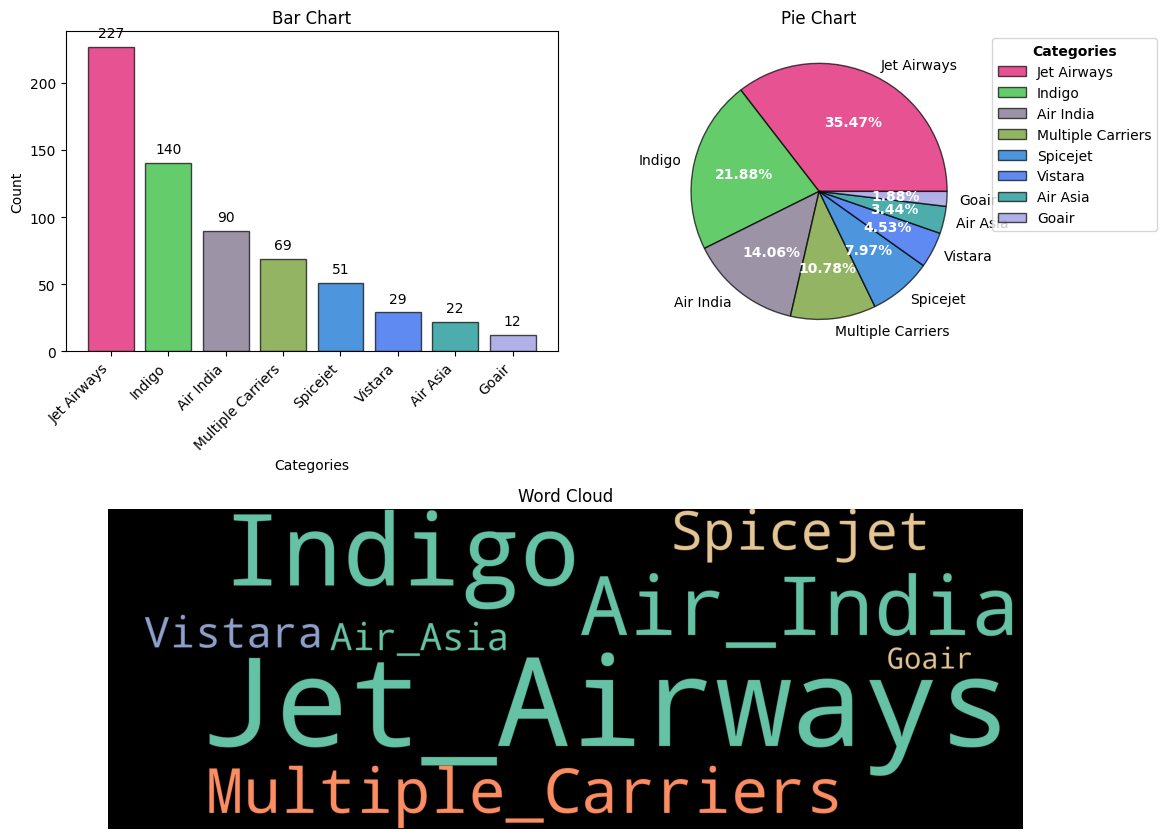

In [30]:
eda_helper_functions.cat_univar_plots(train, "airline")

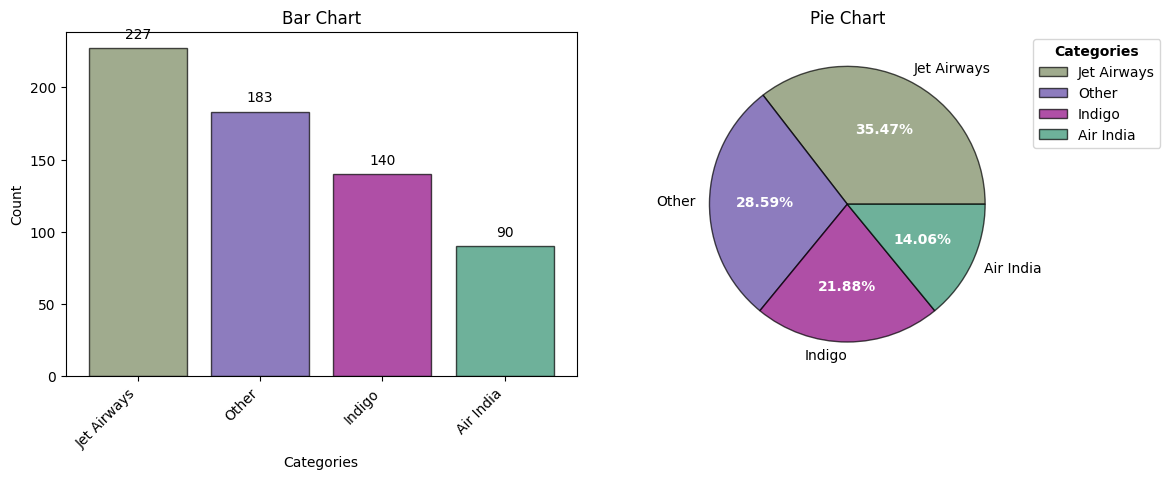

In [31]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

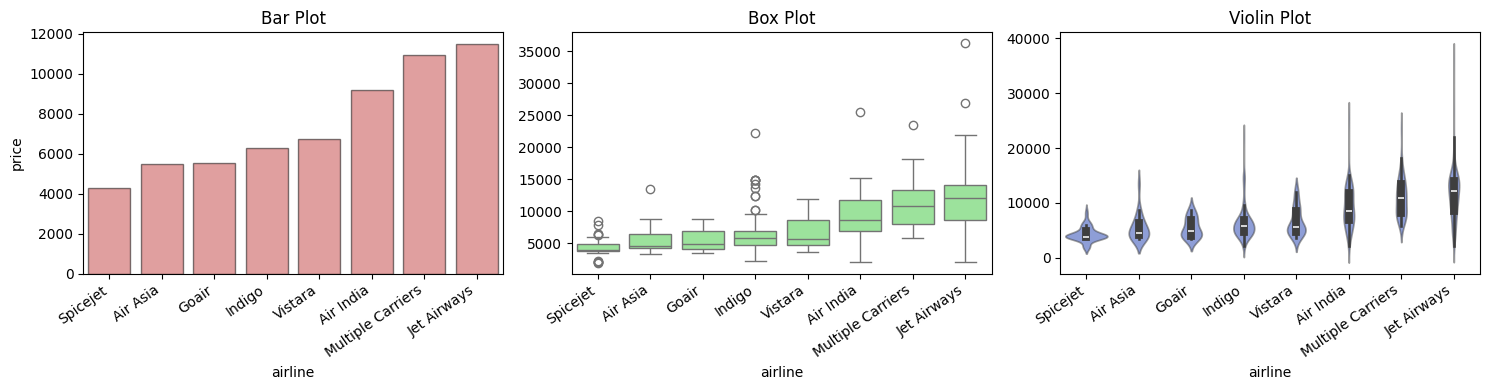

In [32]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [33]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 52.0673364975852
- p-value              : 1.4430873052737509e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 277.1493479000338
- p-value              : 4.552668364071127e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


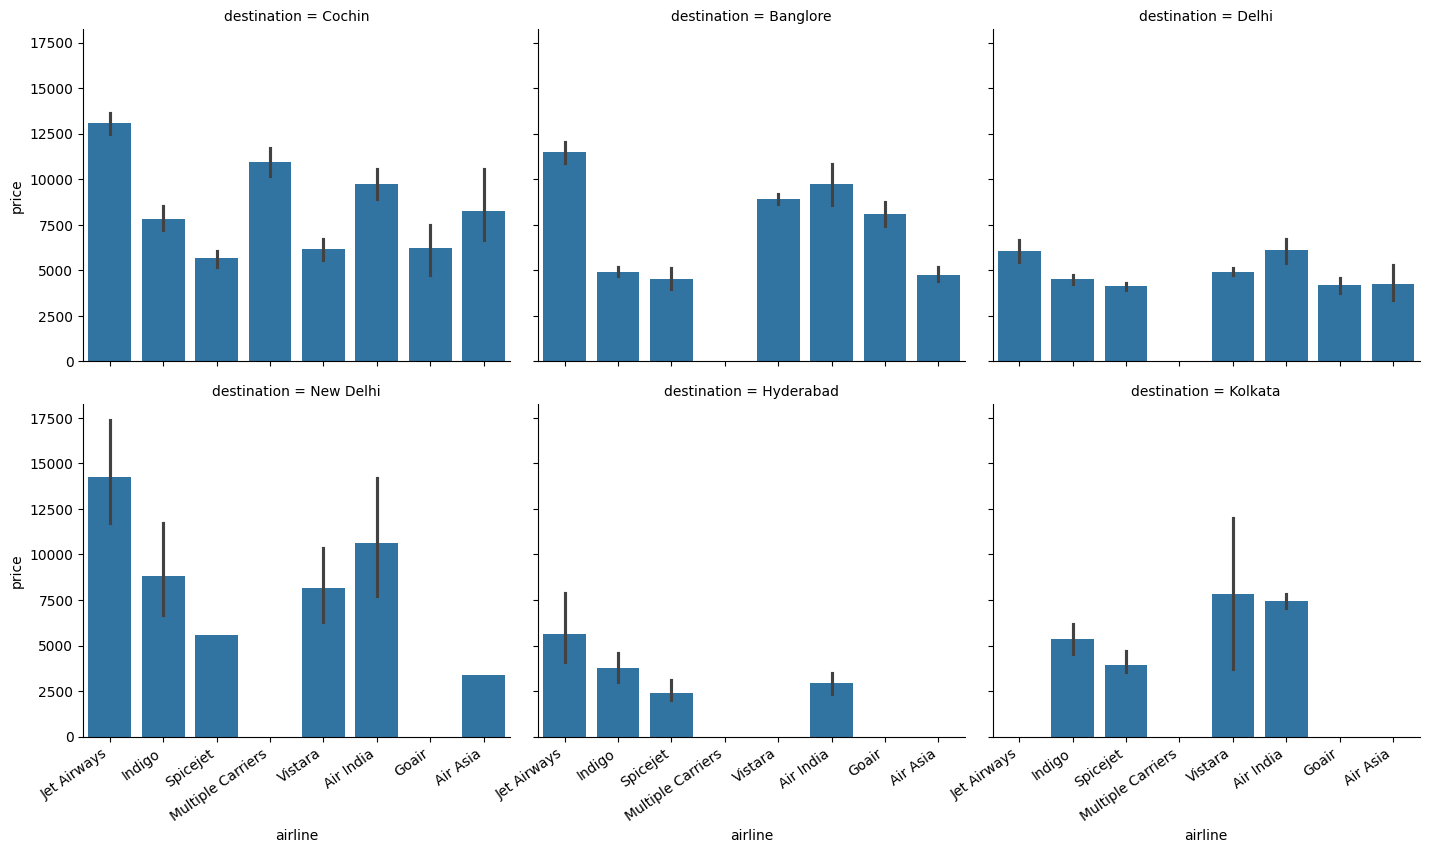

In [34]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [35]:
train.date_of_journey

0     2019-03-21
1     2019-05-12
2     2019-03-06
3     2019-03-09
4     2019-04-15
         ...    
635   2019-06-03
636   2019-05-27
637   2019-04-09
638   2019-03-12
639   2019-06-27
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

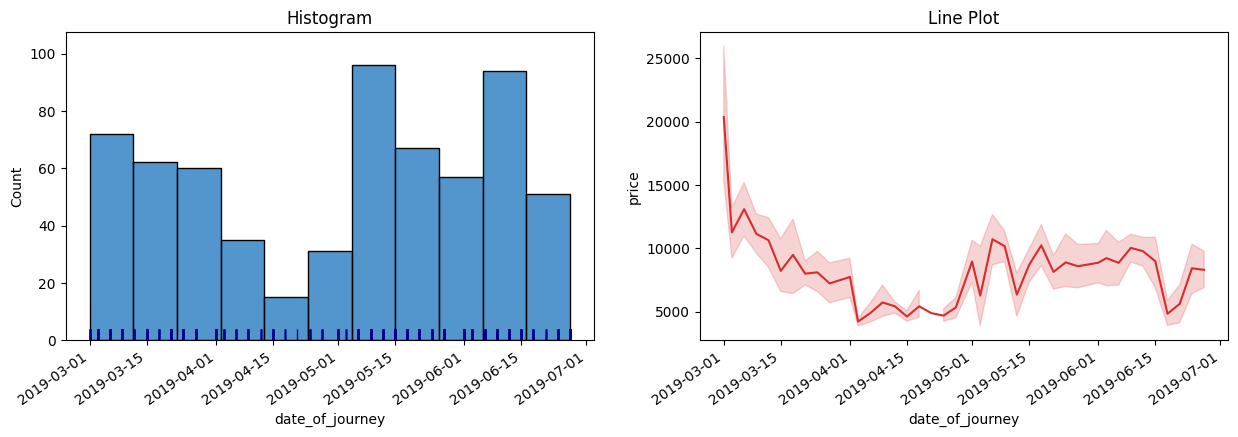

In [36]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

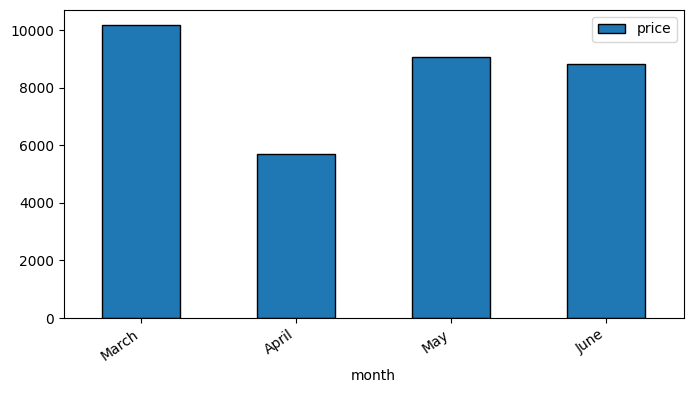

In [37]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

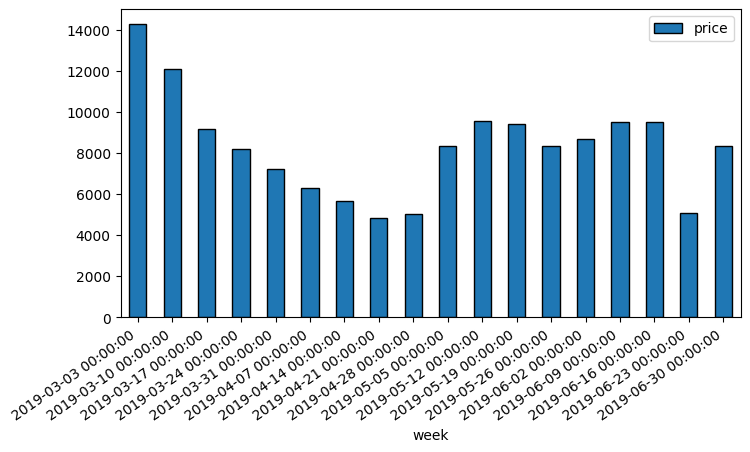

In [38]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

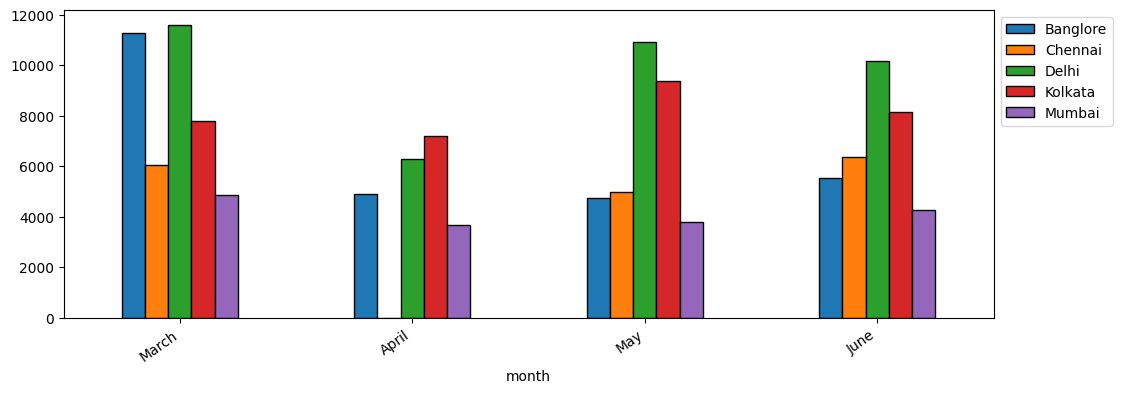

In [39]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [40]:
train.dep_time

0     2024-05-29 05:30:00
1     2024-05-29 19:35:00
2     2024-05-29 13:00:00
3     2024-05-29 04:55:00
4     2024-05-29 09:30:00
              ...        
635   2024-05-29 05:05:00
636   2024-05-29 06:00:00
637   2024-05-29 19:50:00
638   2024-05-29 07:00:00
639   2024-05-29 20:00:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

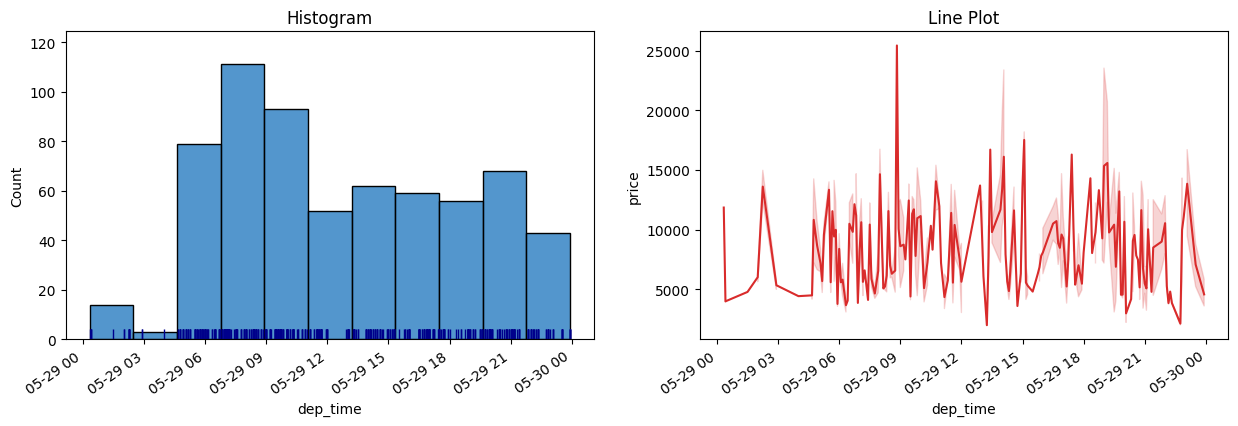

In [41]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

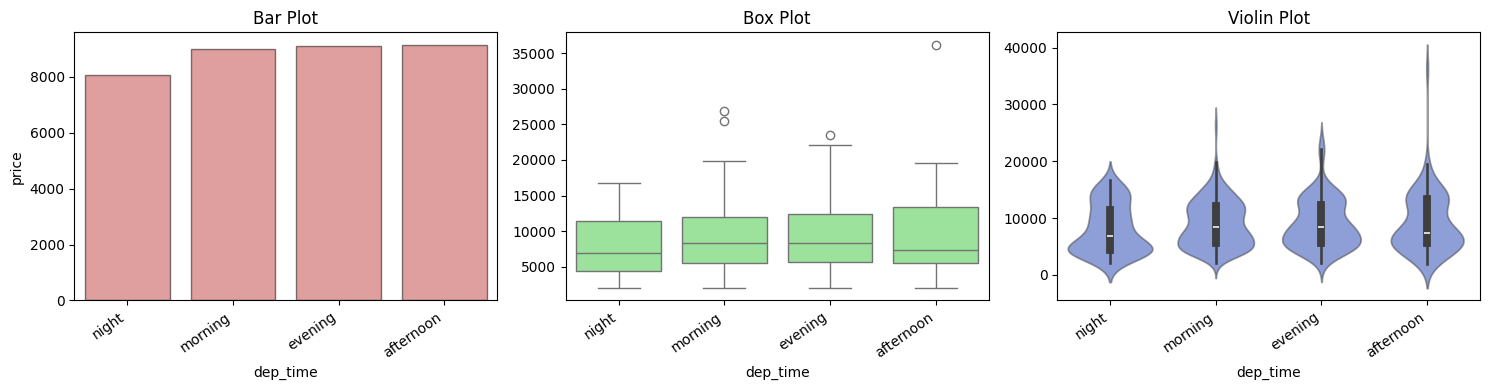

In [42]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [43]:
train.duration

0      2240
1       220
2       350
3       425
4       170
       ... 
635     665
636     795
637     180
638     860
639     505
Name: duration, Length: 640, dtype: int64

In [44]:
eda_helper_functions.num_summary(train, "duration")

0      2240
1       220
2       350
3       425
4       170
       ... 
635     665
636     795
637     180
638     860
639     505
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,480.00
75,900.00
90,1395.00
95,1570.50
99,1936.35


,value
mean,610.406250
trimmed mean (5%),574.253472
trimmed mean (10%),545.234375
median,480.000000


,value
var,243697.487285
std,493.657257
IQR,730.000000
mad,315.000000
coef_variance,0.808736


,value
skewness,0.952138
kurtosis,0.060733


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 5.273594978613516e-22
Test Statistic       : 0.8778934478759766
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 25.968155350372285
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [45]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    480.0
0.75    900.0
Name: duration, dtype: float64

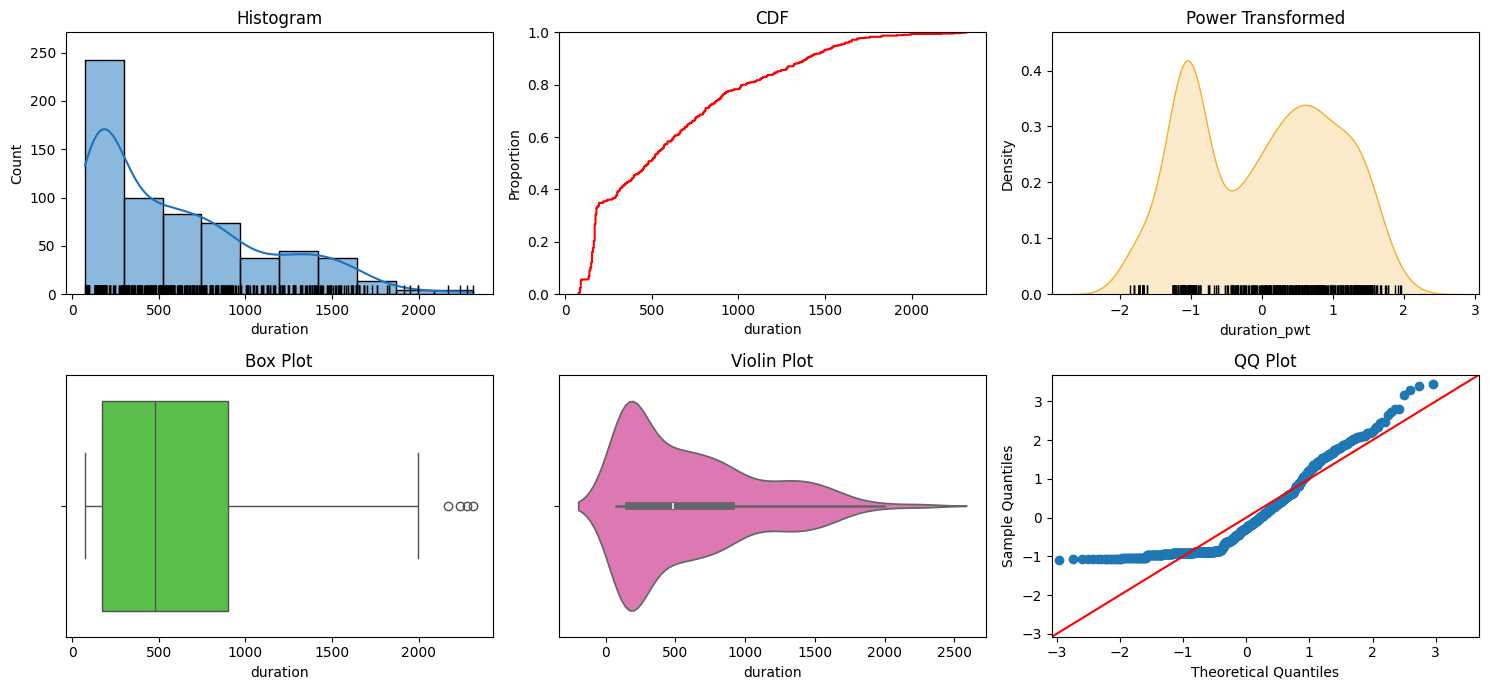

In [46]:
eda_helper_functions.num_univar_plots(train, "duration")

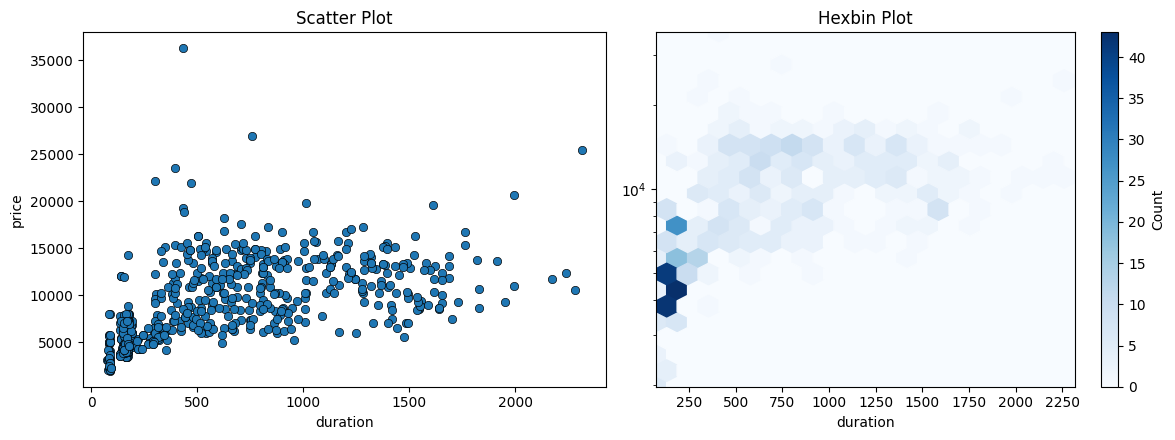

In [47]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [48]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5755919417886324
- p-value              : 9.669801183635064e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7323238137153355
- p-value              : 1.4596627256073556e-108
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


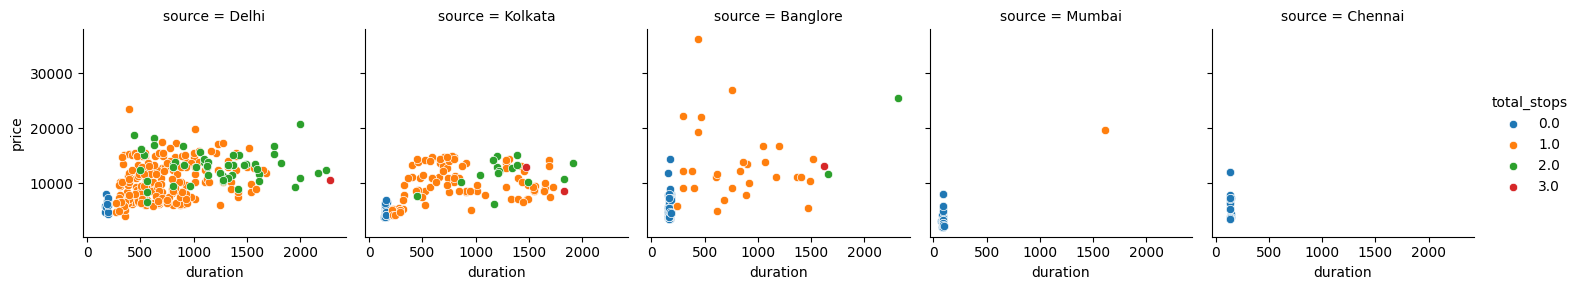

In [49]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

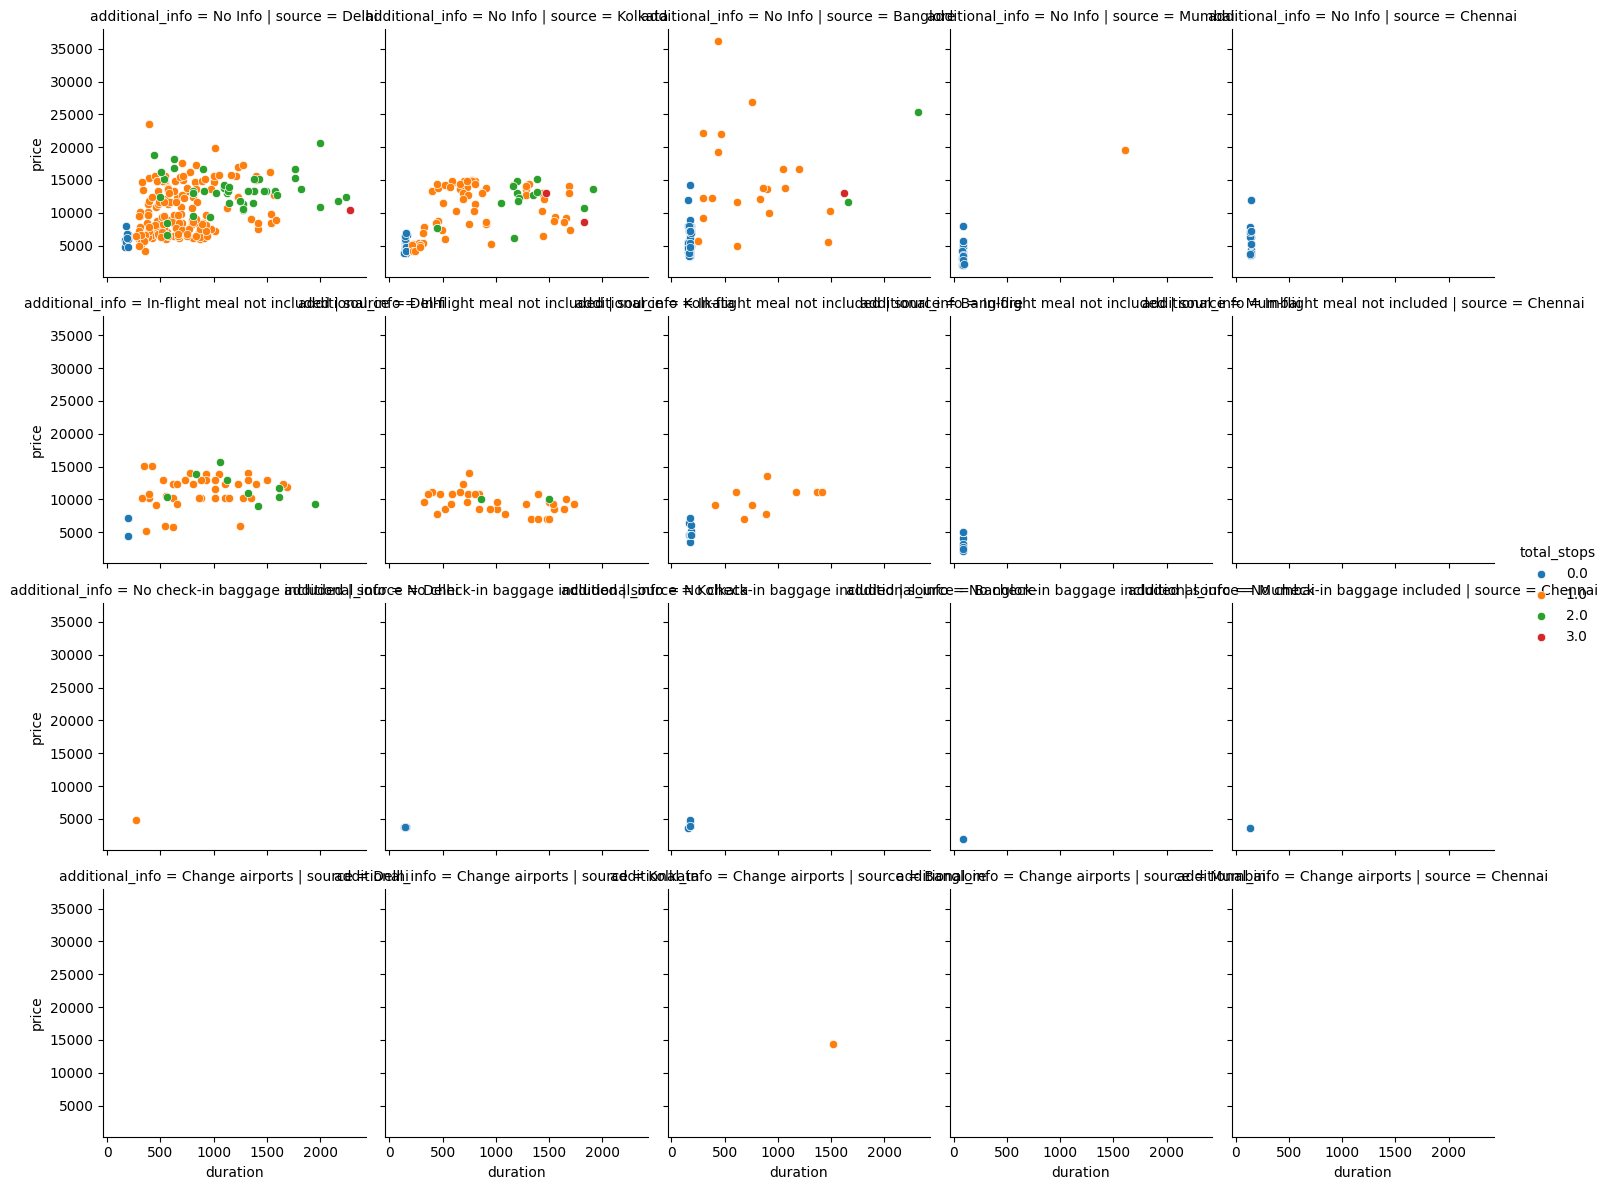

In [50]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [51]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -925.0
Upper Limit : 1995.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
197,Air India,2019-03-09,Delhi,Cochin,2024-05-29 07:05:00,2024-05-29 19:15:00,2170,2.0,No Info,11762
0,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-29 05:30:00,2024-05-29 18:50:00,2240,2.0,No Info,12341
617,Air India,2019-06-03,Delhi,Cochin,2024-05-29 05:15:00,2024-05-29 19:15:00,2280,3.0,No Info,10493
450,Air India,2019-03-01,Banglore,New Delhi,2024-05-29 08:50:00,2024-05-29 23:25:00,2315,2.0,No Info,25430


### 8.5 additional_info

In [52]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1                           No Info
2       In-flight meal not included
3                           No Info
4      No check-in baggage included
                   ...             
635                         No Info
636                         No Info
637     In-flight meal not included
638                         No Info
639                         No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,500


,count,percentage
category,,
No Info,500,0.781250
In-flight meal not included,122,0.190625
No check-in baggage included,17,0.026562
Change airports,1,0.001563


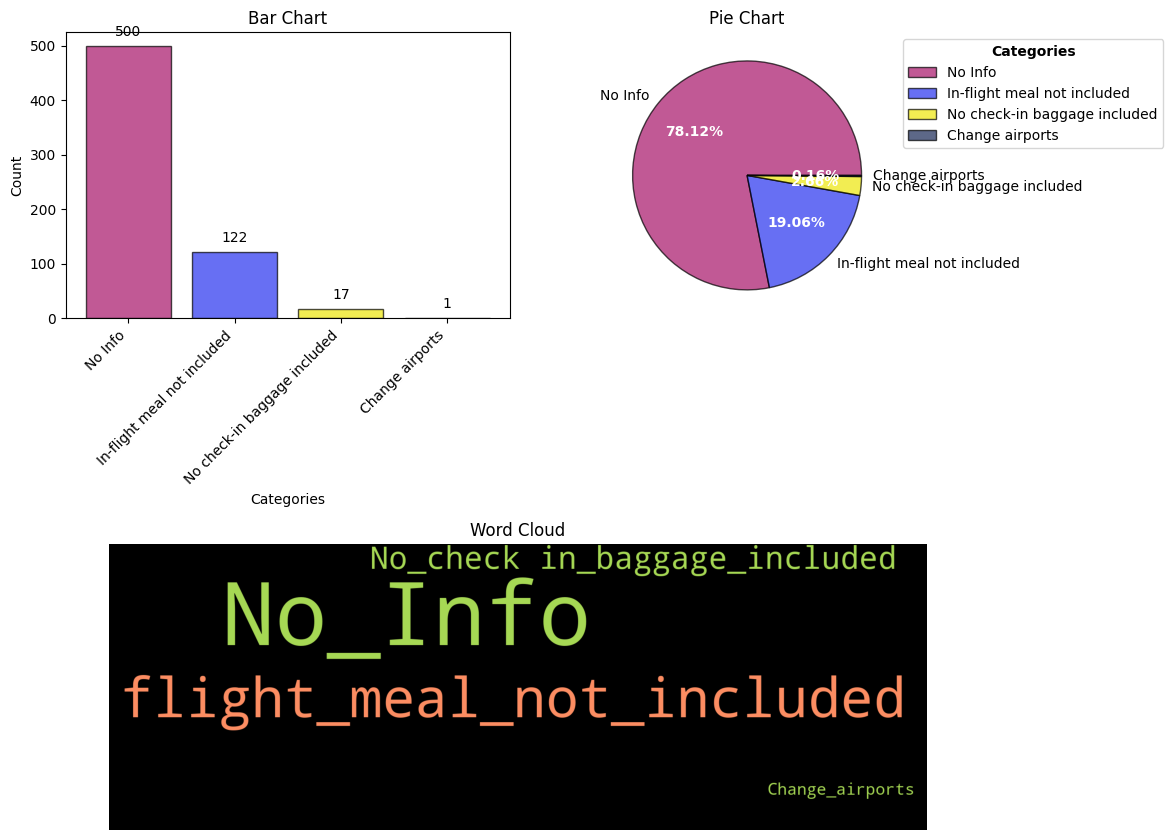

In [53]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

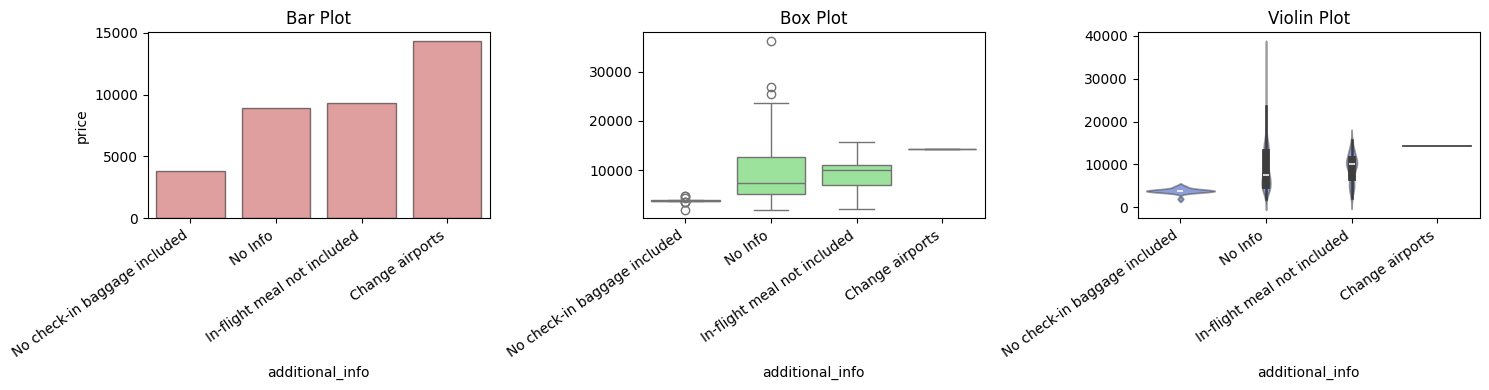

In [54]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

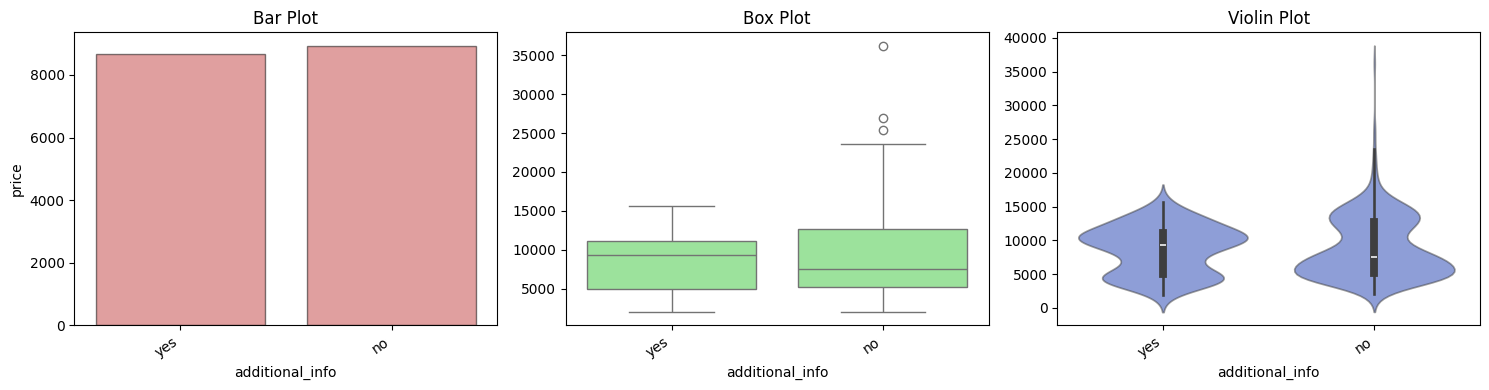

In [55]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- `additional_info` has severely rare categories
- Converted it into a binary feature for further analysis

## 9. Automated EDA

In [60]:
pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Using cached numba-0.59.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.42.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (4.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 1.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 1.6 MB/s eta 0:00:00a 0:00:01
Using cached numba-0.59.1-cp39-cp39-macosx_11_0_arm64.whl (2.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.0/656.0 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.4 MB/s eta 0:00:00 0:00:01
Using cached llvmlite-0.42.0-cp39-cp39-macosx_11_0_arm64.whl (28.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 3.2 MB/s eta 0:00:0000:0100:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4e093d7d48982a9a5a9bf4a6842aac9f4fd77671f9fe6a17638696

In [61]:
from ydata_profiling import ProfileReport

In [62]:
report = ProfileReport(train)

In [63]:
report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]